## 3. 闭包

### 3.1 函数概念深化

```python
# 1 函数定义　　　　代码不执行　　　只有调用代码才会执行
def func():
    print("in func")

# 2 函数调用　　函数名()/
# 函数名就是一个指向函数代码空间的对象　　通过赋值将引用传递另外一个对象
func()
f = func

f()
```



### 3.2 闭包特点

```python
def func(number):
    """这是外层函数"""
    print("in func", number)

    def func_in(number2):
        """这是内层函数"""
        print("in func_in", number + number2)

    return func_in

# 闭包三个特点：　
# １外层函数中嵌套定义了一个内层函数　
# ２　外层函数总是返回内层函数的引用
# 3 内层函数可以使用外层函数提供的变量<自由变量/环境变量>

# 外层函数在执行时  内层函数才刚刚开始定义
# f = func_in   f就是func_in　　同一个引用
f = func(100)
f(999)
```



>   外层函数在执行时  内层函数才刚刚开始定义

### 3.4 案例

 ```python
def SomeOne(name):
    def say(data):
        print("%s说了%s" % (name,data))

    return say

# t1 = say
t1 = SomeOne("Tom")
t1("约吗？")

t2 = SomeOne("Jerry")
t2("约吗？")

t1("晚上有空吗？")
t2("晚上有空吗？")
 ```

>   闭包是 内部函数代码 加 自由变量构成的整体

### 3.5 修改自由变量

​	使用 nonlocal 关键字用来修改(外部函数提供给内部函数使用的)**`自由变量`的值**

​	自由变量是可变类型不需要 nonlocal, 不可变的才需要。

### 3.6 看代码说结果

![00-分析代码作用](day11笔记.assets/00-分析代码作用.png)



## 4. 装饰器

### 4.1 装饰器概述

作用: 添加功能

常用装饰器:  classmethod   staticmethod

使用: 

````python
@xxx   # 装饰
def func():
	pass

# func = xxx(func)  今天重点理解  装饰过程
# func 调用与否 xxx 装饰器都会执行
````

作用: 不修改代码  扩展功能

装饰器函数的特点:  闭包结构 + 参数要求(只有一个 被装饰的函数的引用)

>   装饰器   在给用户提供网页的时候 强制用户进行登录



### 4.2 装饰器统计函数运行时间

```python
import time

def get_time(func):
    def inner():
        begin = time.time()  # 时间戳
        # 调用原函数功能
        func()
        end = time.time()
        print("函数花费了 %s" % (end-begin))
    return inner

@get_time
def f1():
    print("in func begin")
    time.sleep(1)
    print("in func end")
# func = get_time(f1)

@get_time
def f2():
    print("in func2 begin")
    time.sleep(3)
    print("in func2 end")
# f2 = get_time(f2）

f1()
f2()
```

### 4.3 装饰有任意参数、返回值的函数

```python
def 装饰器函数(原函数引用):
    def 内部函数(*args, **kwargs):
        # 扩展功能
        ret = 原函数()
        # 扩展功能
        return ret
    return 内部函数


@装饰器函数
def f1():
    pass
```



```python
import time

def get_time(func):
    #      接收所有的位置参数 关键字参数
    def inner(*args, **kwargs):
        begin = time.time()  # 时间戳
        # 执行原函数  将返回值暂存 在合适的位置返回即可
        ret = func(*args, **kwargs)   # 内部函数将所有的参数全部原封不动传原函数
        end = time.time()
        print("函数花费了 %s" % (end-begin))
        return ret

    return inner


@get_time
def f1(n1,n2):
    print("in func begin")
    time.sleep(1)
    print("in func end %s" % (n1 + n2))
    return 250
# func = get_time(f1)

@get_time
def f2(n1):
    print("in func2 begin")
    time.sleep(3)
    print("in func2 end %s" % n1)
    return 520

# f2 = get_time(f2）

print(f1(100,1))
print(f2(88))
```



### 4.4 装饰器工厂函数

厂: 皮革厂、被服厂

>   生产装饰器的 函数

需求: 装饰器函数参数有且只能有一个 ，就是是被装饰的函数的引用, 导致不能给内部代码传入更多的参数。因此可以将整个装饰器作为内部函数放到工厂函数中，由外部函数即工厂函数接收参数，通过遗传给内部代码使用。

```python
def 装饰器工厂(内部代码所需的参数,....)
	def 装饰器函数(原函数引用):
        def 内部函数(*args, **kwargs):
            # 扩展功能
            ret = 原函数()
            # 扩展功能
            return ret
        return 内部函数
	return 装饰器函数
	
@装饰器工厂(内部代码所需的参数,....)
def f1():
    pass

# 分两步理解
# 1 装饰器 = 装饰器工厂(内部代码所需的参数,....) 
# 2 @装饰器对下面函数进行装饰  f1 = 装饰器(f1)
# 分一步理解
# f1 = 装饰器工厂(内部代码所需的参数,....)(f1)
```

 比如传 0 打印整数结果;1打印浮点数结果

```python
import time


def get_run_time(flag):
    """装饰器工厂函数: 作用1接收装饰器内部代码所需要的参数 2 产生装饰器"""
    def get_time(func):
        #      接收所有的位置参数 关键字参数
        def inner(*args, **kwargs):
            begin = time.time()  # 时间戳
            # 执行原函数  将返回值暂存 在合适的位置返回即可
            ret = func(*args, **kwargs)   # 内部函数将所有的参数全部原封不动传原函数
            end = time.time()
            if flag == 0:
                print("函数花费了 %s" % int(end - begin))
            else:
                print("函数花费了 %s" % (end-begin))
            return ret

        return inner
    return get_time

@get_run_time(1)
def f1(n1,n2):
    print("in func begin")
    time.sleep(1)
    print("in func end %s" % (n1 + n2))
    return 250
#func = get_time(f1)

print(f1(100,1))
```

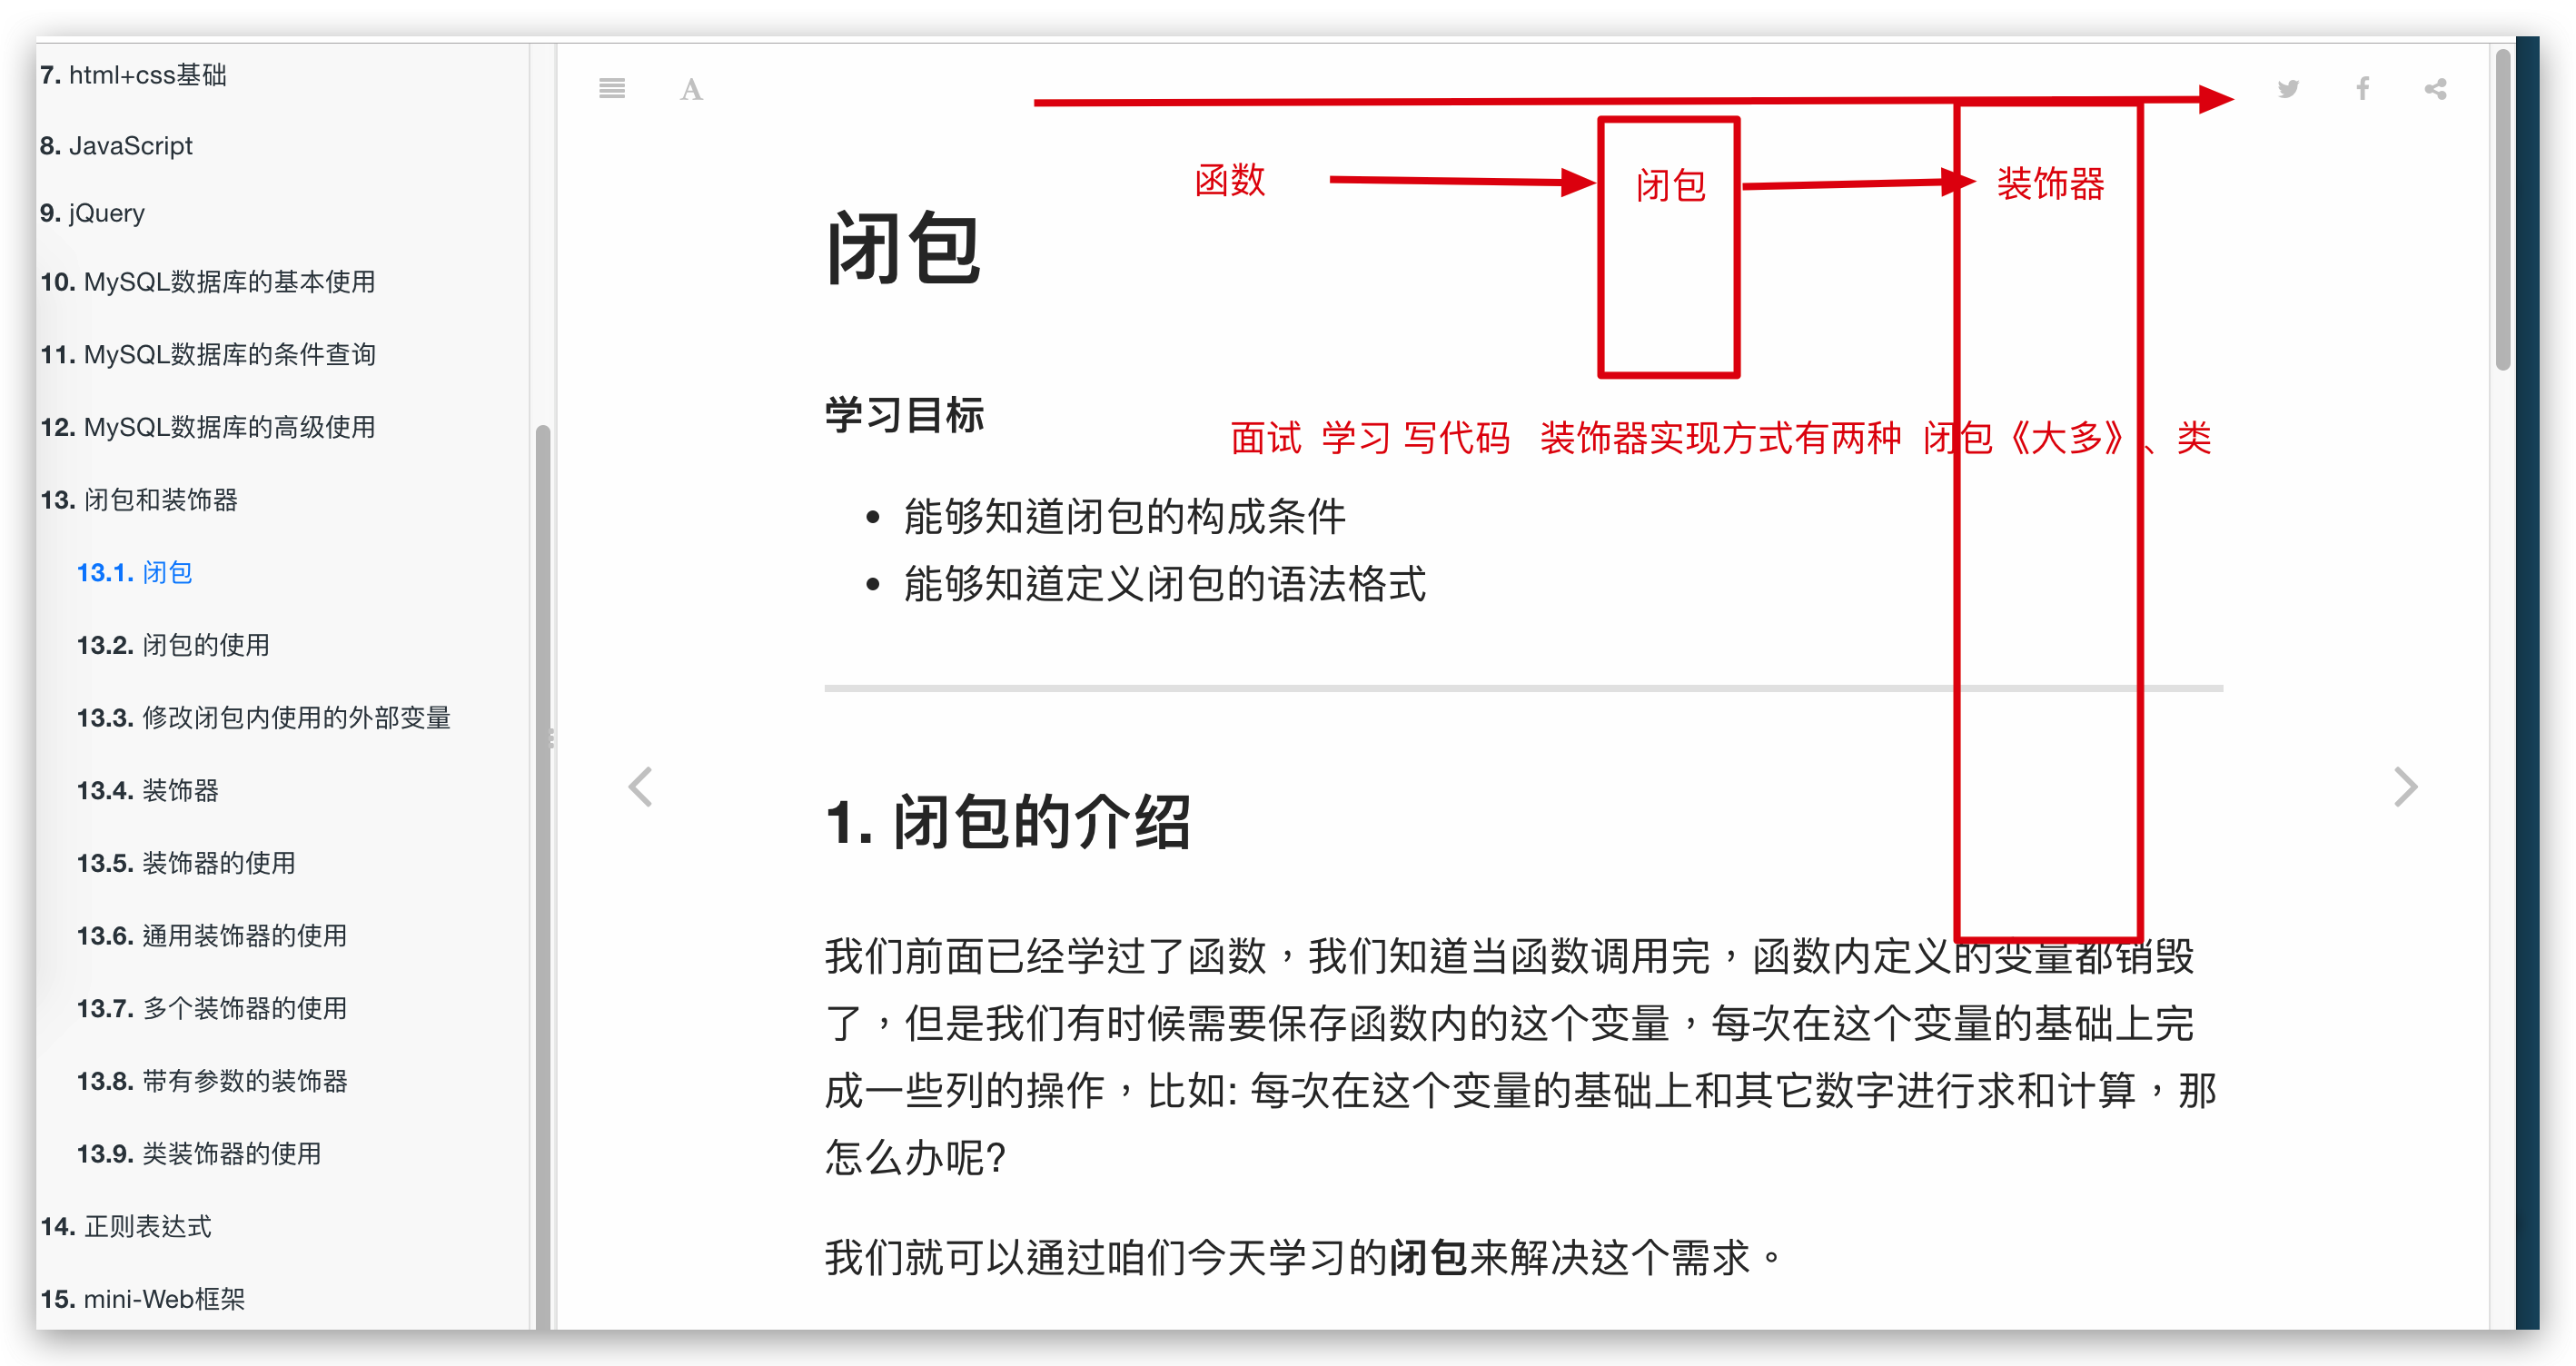

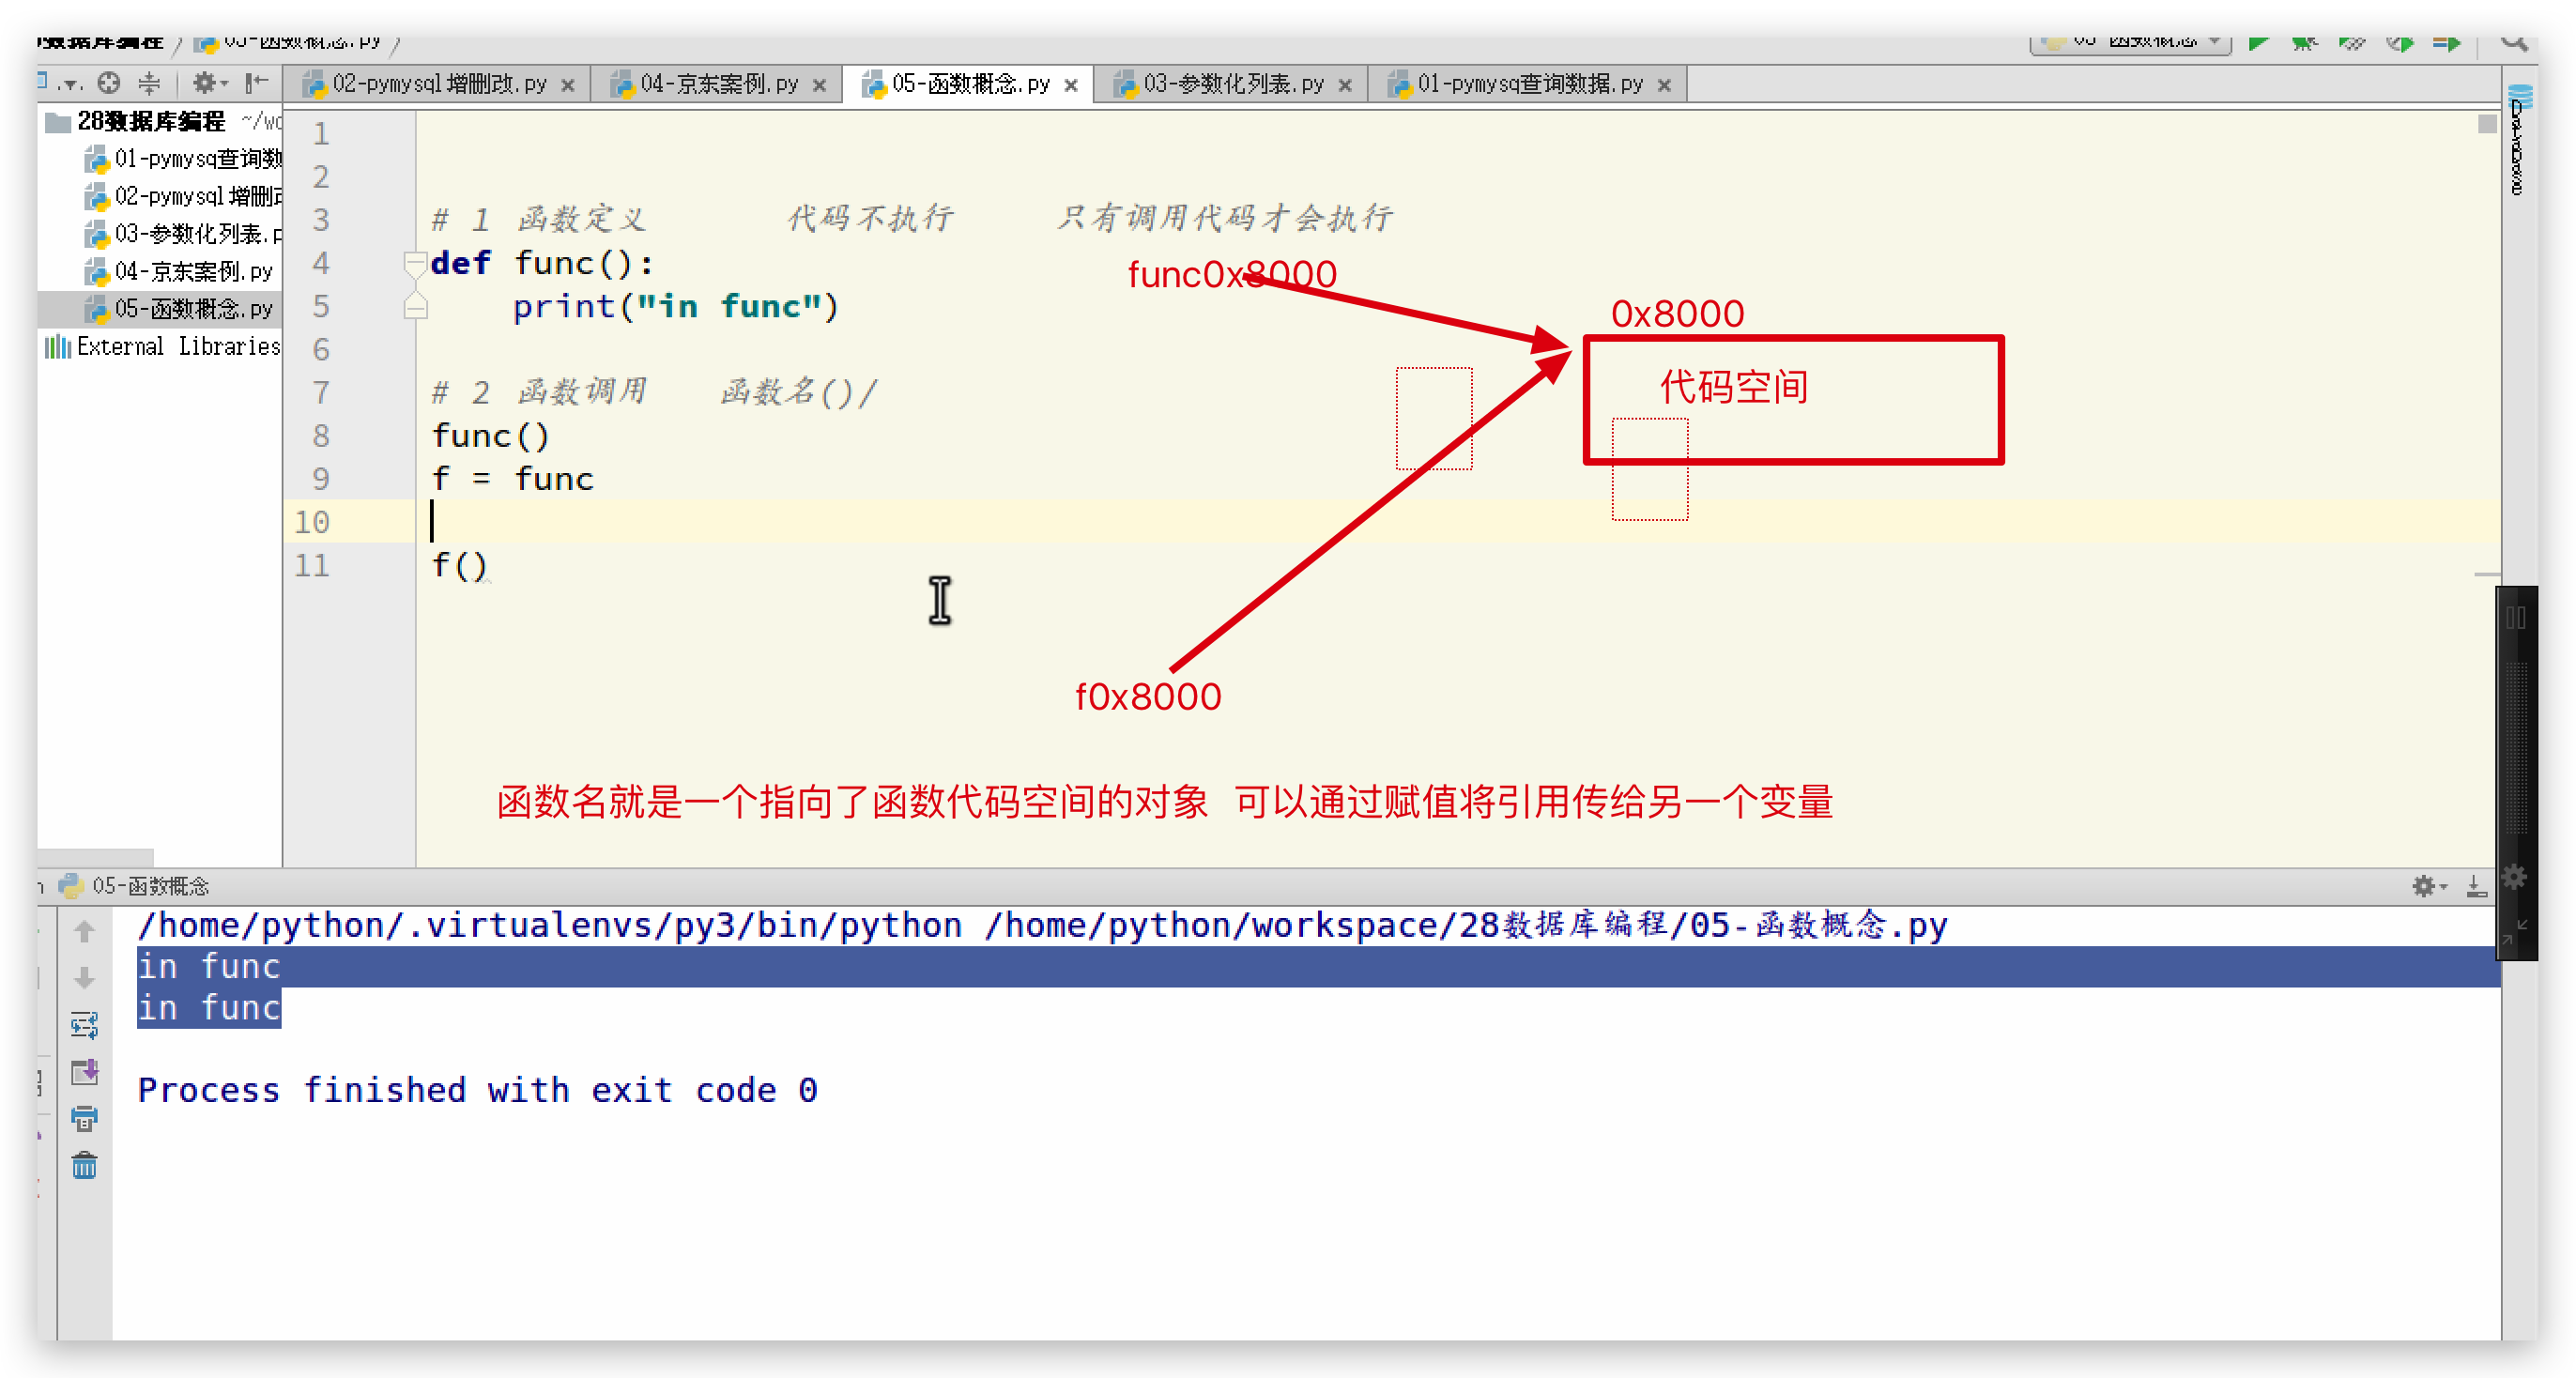

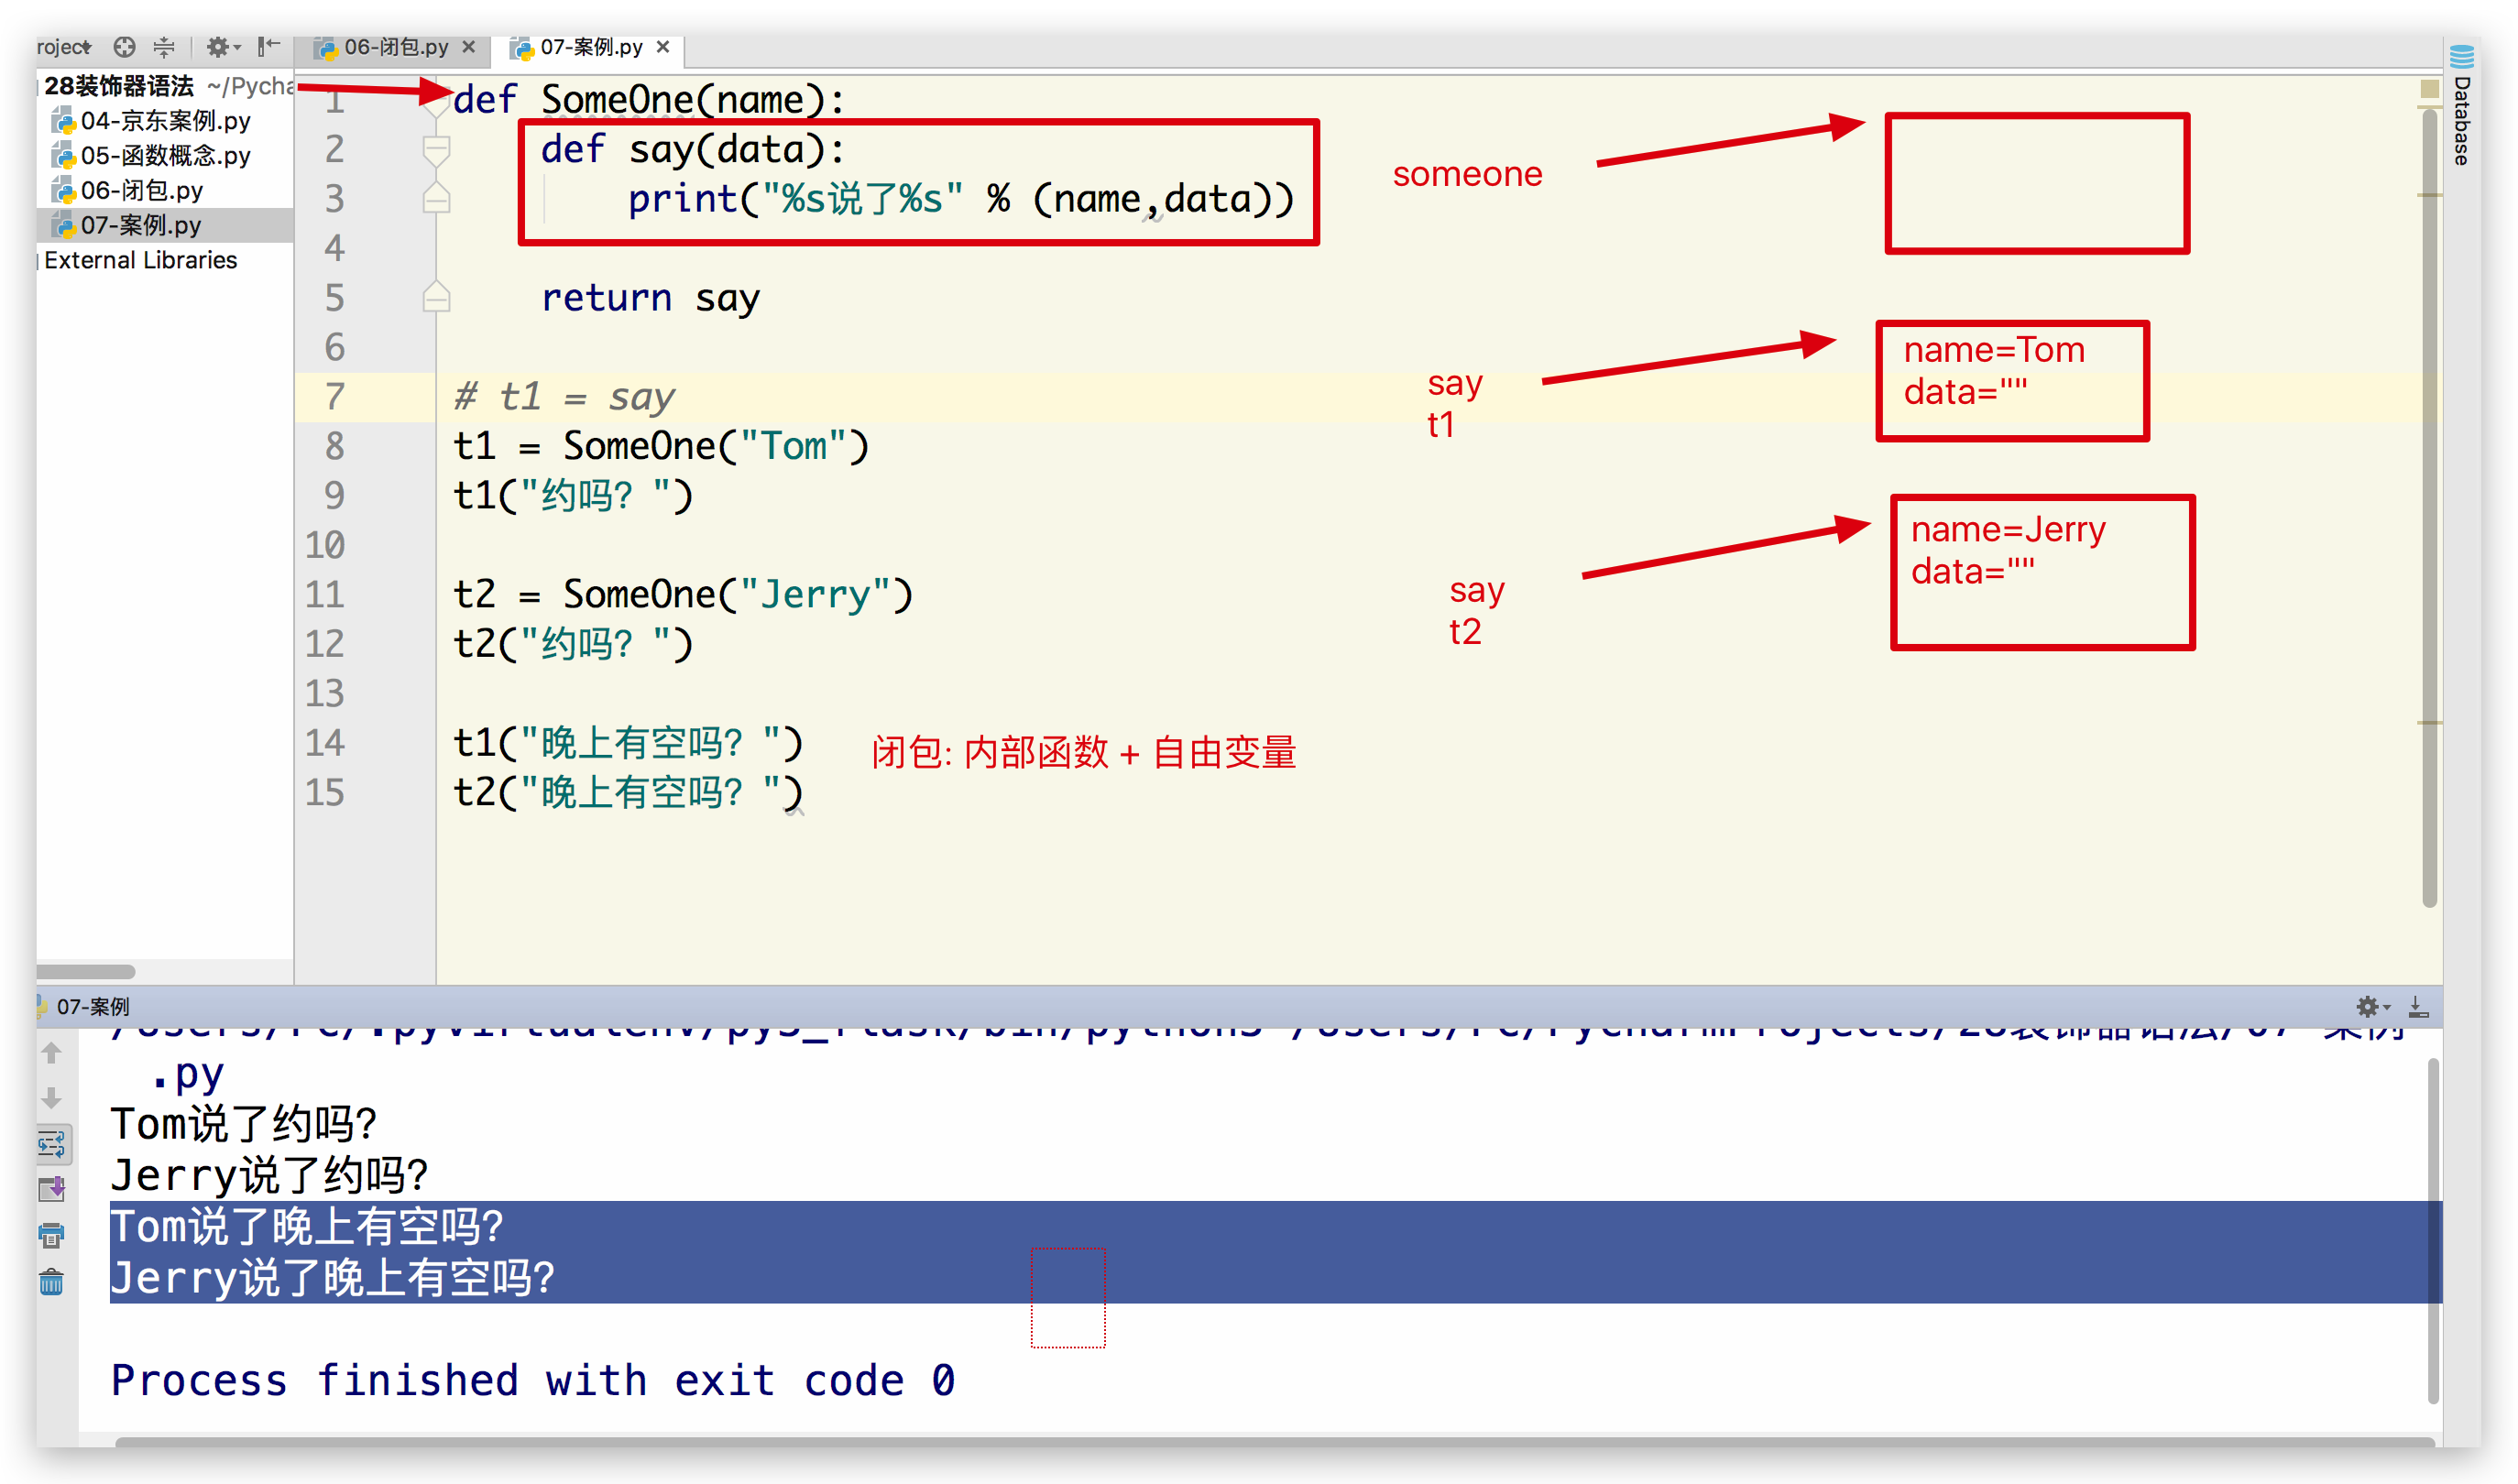

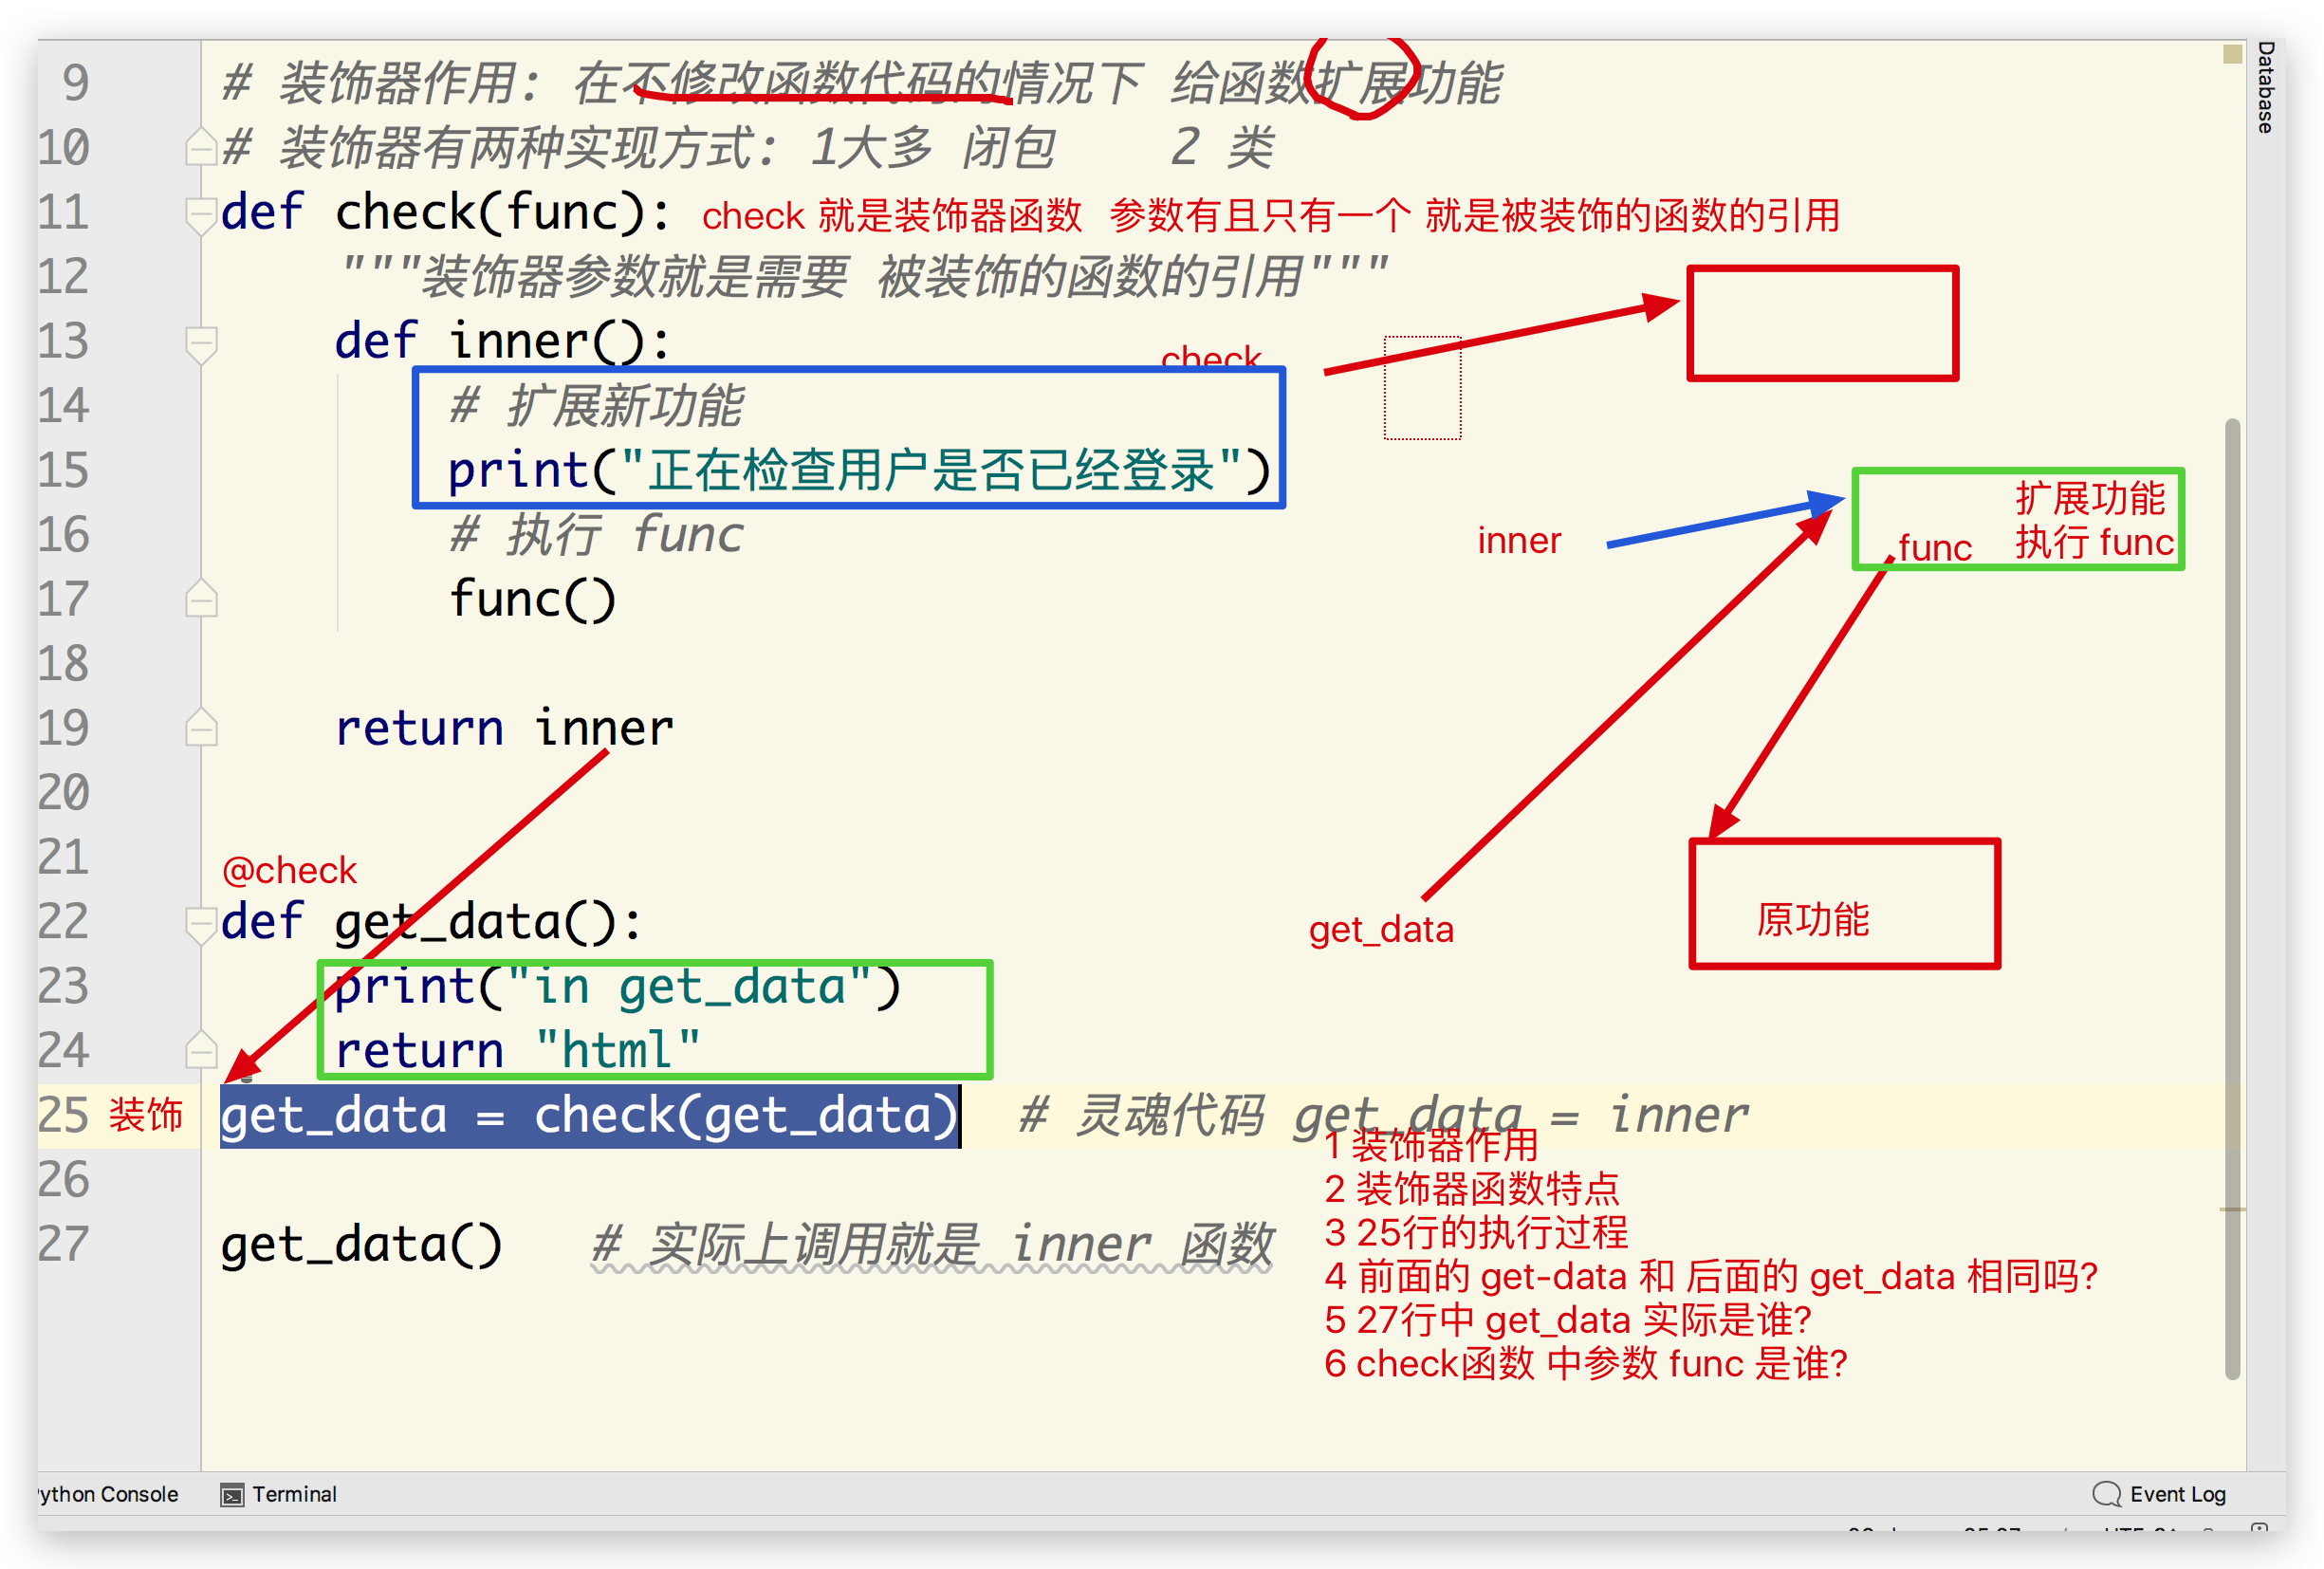

## 1. 重点复习

>   内功心法   编程思想

函数概念

闭包语法及特点、概念

装饰器作用、语法特点

装饰器运行过程<灵魂代码>

编写通用装饰器

编写装饰器工厂函数

```python
# 函数概念   定义函数  代码不执行  只有通过引用调用才会执行
def 函数名():
    # 函数体代码  
    
# 函数调用   函数名 是指向了函数代码空间的对象
# 可以通过赋值将引用传给其他对象 可以通过赋值接收来其他函数的引用
函数名()
对象 = 函数名
对象()

# 闭包语法及特点、概念(内部函数代码 + 自由变量)
def func(n):
    def func_in():
		pass
    	print(n)
    return func_in

# 装饰器作用、语法特点
# 在不修改代码的情况下  对函数功能进行扩展
# 装饰器函数特点 有且只有一个参数  被装饰的原函数引用
def func(f):
    """f是被装饰的原函数引用"""
    def func_in(*args, **kwargs):
    	# 扩展功能可以放在这里
    	ret = f(*args, **kwargs)
		# # 扩展功能可以放在这里
        return ret
    
    return func_in

f()  # 实际上调用就是内层函数

# 装饰器运行过程<灵魂代码>   f1 = func(f1)
@func
def f1():
    """这是原函数"""

# 编写装饰器工厂函数《有参数的装饰器》
# 装饰器只能接收一个参数 不能接收更多的参数
# 将装饰器内置到一个外层函数中  由外层函数接收参数 内层使用即可
def func_factory(flag):
    def func(f):
        """f是被装饰的原函数引用"""
        def func_in(*args, **kwargs):
            # 扩展功能可以放在这里
            ret = f(*args, **kwargs)
            # # 扩展功能可以放在这里
            return ret

        return func_in
    return func

@func_factory(flag=0)
def f2():
    pass

# f2 = func_factory(flag=0)(f2)
```

## 2. 装饰器高级

### 2.1 多个装饰器装饰过程

````python
@装饰器4
@装饰器3
@装饰器2
@装饰器1
def fn():
    pass

# 灵魂代码就是装饰过程 
# fn = 4(3(2(装饰器1(fn))))
````





### 2.2 类装饰器-了解

>   装饰器有两种实现方式  一种是基于闭包 一种是基于类的 

```python
class 类名(object):
    def __init__(self, func):
        # 保存函数引用  类似于外层函数
        self.func = func
        
    def __call__(self, *args, **kwargs):
        # 执行扩展功能
        # 执行原函数  
        self.func()
    
@类名
def fn():
    pass
# fn = 类名(fn) fn 就是一个实例对象

fn()  # fn.__call__()
```

### 2.3 装饰器的工作规范

>   functools.wraps() 作用   
>
>   默认情况 inner 替换原函数所有信息(原函数名称、描述、帮助信息)
>
>   为了方便用户进行查询 需要保留函数的(原函数名称、描述、帮助信息)
>
>   需要在装饰器函数中内部函数inner上   **@functools.wraps(原函数)**

````python
import time
from functools import wraps

def get_time(func):
    """这是我们装饰器的外部函数"""
    @wraps(func)
    def inner():
        """这是我们装饰器的内部函数"""
        begin = time.time()  # 时间戳
        func()
        end = time.time()
        print("函数花费了 %s" % (end-begin))
    return inner

@get_time
def getindex():
    """这是一个用来提供首页的函数"""
    return "index"

# getindex()
print(getindex.__name__) # 前: inner
print(getindex.__doc__)  # 前: 这是我们装饰器的内部函数
print(help(getindex))